In [62]:
#import libraries
from scipy.interpolate import interp1d
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [93]:
#read the data
data = pd.read_csv(r'C:\Users\jonat\Downloads\Projects\1 - Python Project\AB_NYC_2019.csv')
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# <font size="15">Data Cleaning:</font>

In [94]:
#checking to see which columns have no data

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
name - 0%
host_id - 0%
host_name - 0%
neighbourhood_group - 0%
neighbourhood - 0%
latitude - 0%
longitude - 0%
room_type - 0%
price - 0%
minimum_nights - 0%
number_of_reviews - 0%
last_review - 21%
reviews_per_month - 21%
calculated_host_listings_count - 0%
availability_365 - 0%


In [95]:
#filling in the data needed for 'reviews_per_month' to not show 'NaN'

data['reviews_per_month'].fillna(0,inplace=True)
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [97]:
#filling in the data needed for 'last_review' to show that there are no reviews for that property

data['last_review'].fillna('No Reviews',inplace=True)
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0  No Reviews   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [110]:
#re-running to check and make sure each column has data

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
name - 0%
host_id - 0%
host_name - 0%
neighbourhood_group - 0%
neighbourhood - 0%
latitude - 0%
longitude - 0%
room_type - 0%
price - 0%
minimum_nights - 0%
number_of_reviews - 0%
last_review - 0%
reviews_per_month - 0%
calculated_host_listings_count - 0%
availability_365 - 0%


In [111]:
#looking at the type of each column for further analysis if needed

print(data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [171]:
#remove duplicates in the data

data['id'].drop_duplicates().sort_values(ascending=False)

#luckily there are no duplicates in the dataset

48894    36487245
48893    36485609
48892    36485431
48891    36485057
48890    36484665
           ...   
4            5022
3            3831
2            3647
1            2595
0            2539
Name: id, Length: 48895, dtype: int64

# <font size="15">Scatter Mapbox:</font>

In [173]:
#creating a list to evaluate the data in 'reviews_per_month' and present it as a heat map

list1 = data.reviews_per_month.values.tolist()
list1

[0.21,
 0.38,
 0.0,
 4.64,
 0.1,
 0.59,
 0.4,
 3.47,
 0.99,
 1.33,
 0.43,
 1.5,
 1.34,
 0.91,
 0.22,
 1.2,
 1.72,
 2.12,
 4.44,
 0.0,
 0.07,
 1.09,
 0.37,
 0.61,
 0.73,
 1.37,
 0.0,
 0.49,
 1.11,
 0.24,
 2.04,
 1.42,
 1.65,
 2.37,
 0.66,
 1.41,
 0.0,
 1.96,
 0.0,
 1.81,
 2.08,
 0.39,
 0.23,
 0.69,
 0.84,
 0.49,
 2.25,
 0.52,
 0.1,
 1.16,
 1.01,
 0.63,
 0.7,
 2.82,
 0.22,
 0.9,
 0.17,
 2.49,
 1.19,
 0.3,
 0.38,
 0.12,
 0.57,
 1.33,
 0.23,
 1.65,
 0.16,
 4.72,
 1.4,
 1.26,
 1.64,
 0.43,
 0.43,
 1.6,
 0.92,
 0.2,
 1.5,
 0.22,
 1.28,
 1.65,
 0.54,
 0.49,
 0.62,
 0.15,
 0.84,
 0.24,
 0.53,
 1.73,
 0.05,
 1.54,
 0.28,
 3.4,
 0.2,
 0.3,
 1.57,
 1.05,
 0.71,
 0.11,
 0.27,
 1.23,
 0.87,
 2.09,
 0.6,
 0.55,
 3.02,
 0.79,
 1.46,
 0.4,
 1.61,
 0.2,
 3.0,
 0.2,
 0.13,
 4.22,
 0.06,
 0.38,
 3.01,
 0.27,
 1.05,
 3.2,
 2.03,
 0.24,
 0.12,
 0.23,
 0.08,
 0.08,
 0.19,
 0.33,
 0.58,
 1.42,
 2.35,
 0.66,
 1.86,
 0.29,
 0.45,
 0.25,
 0.02,
 3.89,
 2.09,
 0.77,
 0.03,
 0.1,
 0.04,
 0.01,
 1.72,
 0.11,
 2.19

In [140]:
#create heatmap with locations of airbnb's to show which places get the most reviews per month

m = interp1d([0,max(list1)],[1,20])
circle_radius = m(list1)

open-street-map


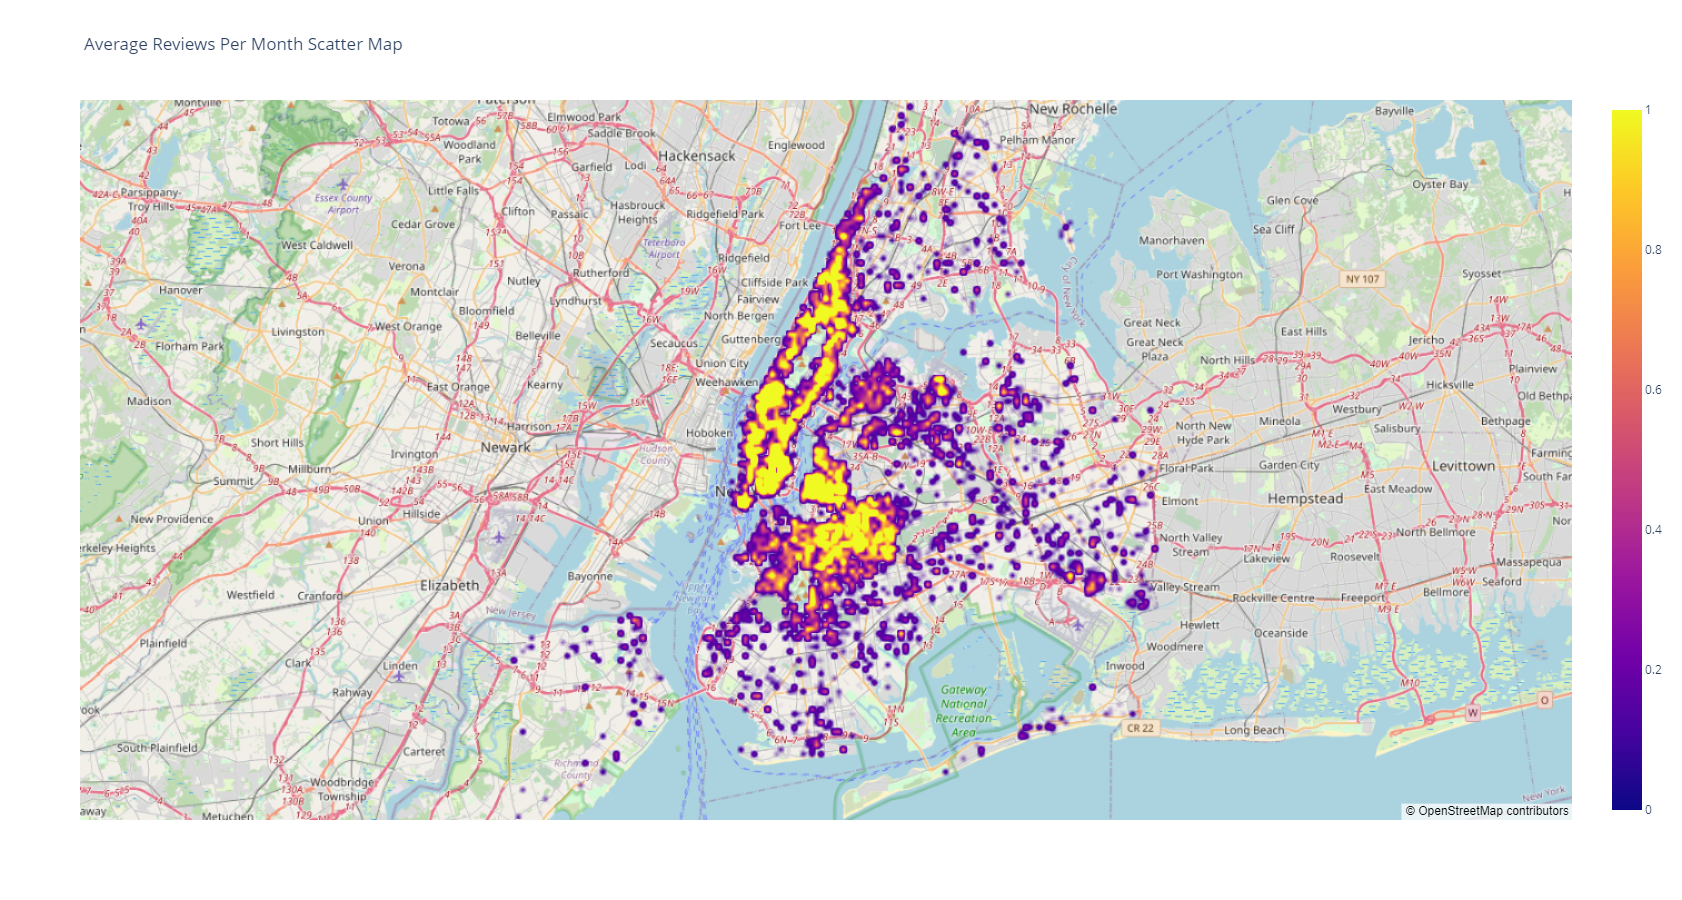

In [200]:
#in here we created a map of New York with density plots to show where airbnb locations are being rented out the most based on number of reviews per month
#tylelist contains all of the various themes we want to use

typelist = ['open-street-map']
#can you these themes in typelist too: ['open-street-map', 'white-bg','carto-positron','carto-darkmatter','stamen-terrain','stamen-toner','stamen-watercolor']

#used a loop to show data for each of the themes above
for i in typelist:
    print(i)
    fig = px.density_mapbox(data, lat='latitude',lon='longitude', radius=circle_radius,zoom=10, mapbox_style=i, width=1200, height=900, title='Average Reviews Per Month Scatter Map')
    fig.show()

In [142]:
#from the data above we can see that in the NYC/Brooklyn area it is more heavily populated with reviews. This could also be due to more people renting in these areas and not just soley based on reviews.

# <font size="15">Data Exploration and Outliers:</font>

In [174]:
#sorting the data to see if there are any outliers we can get rid of
#we will try to remove outliers in 'reviews_per_month' and 'minimum_nights'

sort = data.sort_values(by=['minimum_nights'], inplace=False, ascending=False)
sort.head()

id                                name    host_id  host_name  \
5767    4204302    Prime W. Village location 1 bdrm   17550546  Genevieve   
2854    1615764                                 NaN    6676776      Peter   
38664  30378211        Shared Studio (females only)  200401254        Meg   
13404  10053943  Historic Designer 2 Bed. Apartment    2697686   Glenn H.   
26341  20990053     Beautiful place in Brooklyn! #2  151084261      Angie   

      neighbourhood_group      neighbourhood  latitude  longitude  \
5767            Manhattan  Greenwich Village  40.73293  -73.99782   
2854            Manhattan  Battery Park City  40.71239  -74.01620   
38664           Manhattan  Greenwich Village  40.73094  -73.99900   
13404           Manhattan             Harlem  40.82915  -73.94034   
26341            Brooklyn       Williamsburg  40.71772  -73.95059   

             room_type  price  minimum_nights  number_of_reviews last_review  \
5767   Entire home/apt    180            1250                  2  2014-11-09   
2854   Entire home/apt    400            1000                  0  No Reviews   
38664      Shared room    110             999                  0  No Reviews   
13404  Entire home/apt     99             999                  2  2018-01-04   
26341     Private room     79             999                 24  2018-06-28   

       reviews_per_month  calculated_host_listings_count  availability_365  
5767                0.03                               1               365  
2854                0.00                               1               362  
38664               0.00                               1               365  
13404               0.07                               1                42  
26341               1.12                               6               249

In [204]:
sort = data.sort_values(by=['reviews_per_month'], inplace=False, ascending=False)
sort.head()

id                                               name    host_id  \
42075  32678719  Enjoy great views of the City in our Deluxe Room!  244361589   
42076  32678720           Great Room in the heart of Times Square!  244361589   
38870  30423106                 Lou's Palace-So much for so little  228415932   
27287  21550302  JFK Comfort.5 Mins from JFK Private Bedroom & ...  156684502   
28651  22176831      JFK 2 Comfort 5 Mins from JFK Private Bedroom  156684502   

      host_name neighbourhood_group        neighbourhood  latitude  longitude  \
42075   Row NYC           Manhattan     Theater District  40.75918  -73.98801   
42076   Row NYC           Manhattan     Theater District  40.75828  -73.98876   
38870    Louann              Queens             Rosedale  40.65417  -73.74158   
27287   Nalicia              Queens  Springfield Gardens  40.66110  -73.76830   
28651   Nalicia              Queens  Springfield Gardens  40.66158  -73.77050   

          room_type  price  minimum_nights  number_of_reviews last_review  \
42075  Private room    100               1                156  2019-07-07   
42076  Private room    199               1                 82  2019-07-07   
38870  Private room     45               1                 37  2019-07-08   
27287  Private room     80               1                403  2019-07-06   
28651  Private room     50               1                341  2019-07-08   

       reviews_per_month  calculated_host_listings_count  availability_365  
42075              58.50                               9               299  
42076              27.95                               9               299  
38870              20.94                               1               134  
27287              19.75                               3                26  
28651              17.82                               3                25

# Minimum Nights (outliers)

<AxesSubplot:>

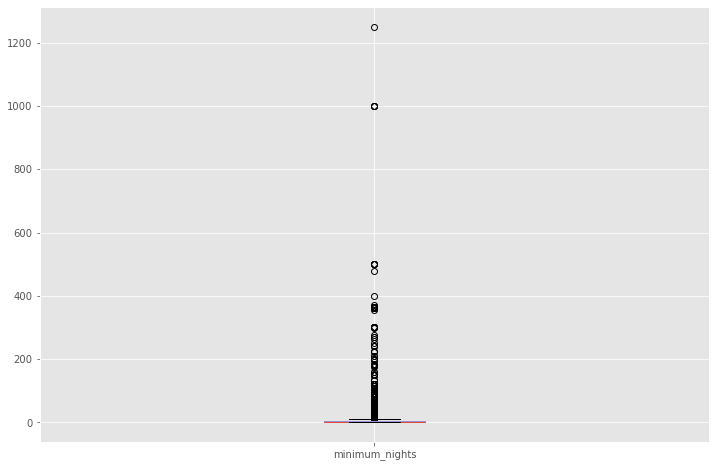

In [232]:
#checking for outliers in the data

data.boxplot(column=['minimum_nights'])
#can also use the following code: sns.boxplot(data['minimum_nights'])

E:\Apps\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

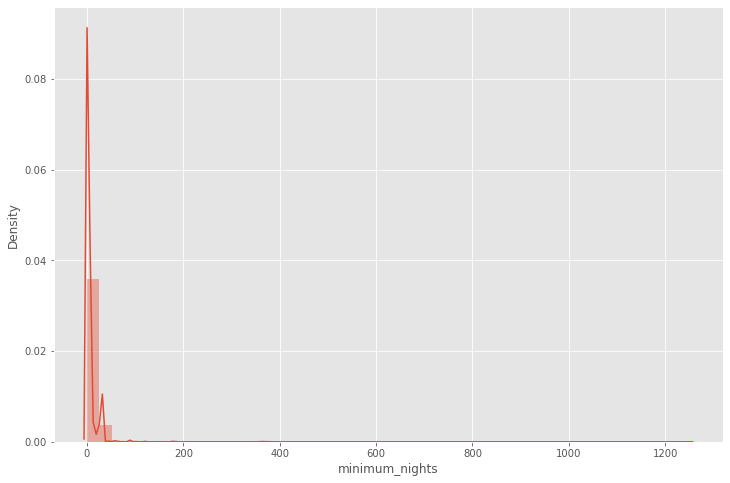

In [233]:
#checking for outliers in the data
sns.distplot(data['minimum_nights'])

#the data is very right-skewed, so we must make adjustments

In [234]:
#let's remove these outliers so that we can use our data properly
upper = data['minimum_nights'].mean() + 3*data['minimum_nights'].std()
lower = data['minimum_nights'].mean() - 3*data['minimum_nights'].std()
print('Upper:',upper,'|','Lower:',lower)

Upper: 68.56161076336177 | Lower: -54.501686435720906


In [235]:
#so we can visually see the outliers, let us make a script to do so

data.loc[(data['minimum_nights'] > upper) | (data['minimum_nights'] < lower)].head()

id                                 name  host_id   host_name  \
14    6090        West Village Nest - Superhost    11975       Alina   
61   15396   Sunny & Spacious Chelsea Apartment    60278       Petra   
106  25235    Large 2 Bedroom Great for Groups!    87773      Shelly   
245  61509  Quiet, clean midtown apt w. elevato    23619  Anna/Fonzy   
349  94209   LARGE 1BR (CONV 2BR) CROWN HEIGHTS   503800      Sadatu   

    neighbourhood_group       neighbourhood  latitude  longitude  \
14            Manhattan        West Village  40.73530  -74.00525   
61            Manhattan             Chelsea  40.74623  -73.99530   
106            Brooklyn  Bedford-Stuyvesant  40.68373  -73.92377   
245           Manhattan             Midtown  40.75749  -73.96897   
349            Brooklyn       Crown Heights  40.67473  -73.94494   

           room_type  price  minimum_nights  number_of_reviews last_review  \
14   Entire home/apt    120              90                 27  2018-10-31   
61   Entire home/apt    375             180                  5  2018-11-03   
106  Entire home/apt    125              90                162  2019-06-28   
245  Entire home/apt    110             200                 92  2019-04-30   
349  Entire home/apt    100              90                  0  No Reviews   

     reviews_per_month  calculated_host_listings_count  availability_365  
14                0.22                               1                 0  
61                0.12                               1               180  
106               1.46                               2               137  
245               0.90                               1               140  
349               0.00                               1               365

In [236]:
#let's remove the outliers in 'minimum_nights' and assign it as new_data

new_data = data.loc[(data['minimum_nights'] < upper) & (data['minimum_nights'] > lower)]
print('old data:', len(data))
print('new data:', len(new_data))
print('outliers removed:', len(data)-len(new_data))

old data: 48895
new data: 48568
outliers removed: 327


In [237]:
#the new data should be adjusted

sort2 = new_data.sort_values(by=['minimum_nights'], inplace=False, ascending=False)
sort2.head()

id                                               name    host_id  \
16245  13098452  3-6month SUBLET Sparkling, spacious, Manhattan...    4942450   
481      168810                  Lovely Vintage Haven—Heart of UWS     747698   
39449  30741070                     Living room in Queens for rent  118839768   
22399  18090927   An Amazing 1-Bedroom Apt. with Spectacular Views     686339   
5092    3662091             Beautiful 1 BR - Downtown Union Square   18556644   

           host_name neighbourhood_group       neighbourhood  latitude  \
16245          Sacha           Manhattan  Washington Heights  40.85073   
481    Linda & Chris           Manhattan     Upper West Side  40.78569   
39449           Виль              Queens     Jackson Heights  40.74766   
22399            Ben           Manhattan            Kips Bay  40.73819   
5092           Heike           Manhattan        East Village  40.73312   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
16245  -73.93851  Entire home/apt    126              68                 17   
481    -73.97581  Entire home/apt    175              65                 11   
39449  -73.88598      Shared room     35              62                  0   
22399  -73.97389  Entire home/apt    150              62                  0   
5092   -73.99097  Entire home/apt    150              62                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
16245  2018-11-10               0.47                               1   
481    2013-10-15               0.12                               1   
39449  No Reviews               0.00                               1   
22399  No Reviews               0.00                               1   
5092   No Reviews               0.00                               1   

       availability_365  
16245                 0  
481                 358  
39449                 0  
22399                88  
5092                358

# Reviews Per Month (Outliers)

### Let's repeat the same steps to remove outliers in 'reviews_per_month' column

<AxesSubplot:>

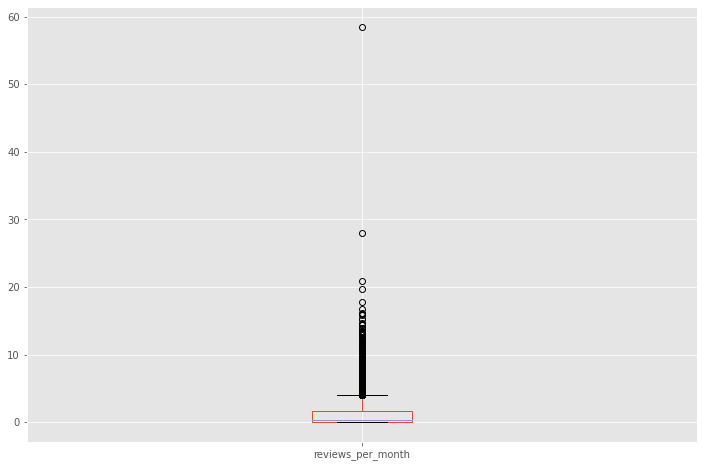

In [238]:
new_data.boxplot(column=['reviews_per_month'])

E:\Apps\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

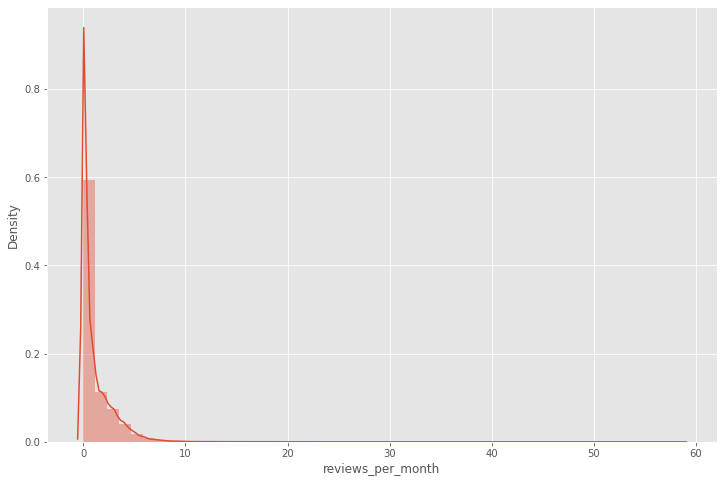

In [239]:
sns.distplot(new_data['reviews_per_month'])

In [240]:
upper = new_data['reviews_per_month'].mean() + 3*new_data['reviews_per_month'].std()
lower = new_data['reviews_per_month'].mean() - 3*new_data['reviews_per_month'].std()
print('Upper:',upper,'|','Lower:',lower)

Upper: 5.898037195334867 | Lower: -3.7046081885814064


In [242]:
new_data.loc[(new_data['reviews_per_month'] > upper) | (new_data['reviews_per_month'] < lower)].head()

id                                               name  host_id  \
471   166172                    LG Private Room/Family Friendly   792159   
534   195233  Hospitality on Propsect Pk-12 yrs Hosting Lega...   949221   
553   205043                            Modern Condo in Midtown  1007558   
1614  732700                Centrally located and spacious apt.  3815537   
1627  741154                Beautiful duplex loft with Skylight  1406458   

                host_name neighbourhood_group              neighbourhood  \
471                 Wanda            Brooklyn                   Bushwick   
534                Dennis            Brooklyn  Prospect-Lefferts Gardens   
553   Welcome To My Place           Manhattan           Theater District   
1614               Reshma           Manhattan                    Midtown   
1627                Nancy           Manhattan                    Tribeca   

      latitude  longitude        room_type  price  minimum_nights  \
471   40.70283  -73.92131     Private room     60               3   
534   40.65513  -73.95641     Private room     43               1   
553   40.75895  -73.98830     Private room    150               1   
1614  40.75154  -73.97104  Entire home/apt    106               7   
1627  40.71778  -74.00452  Entire home/apt    210              14   

      number_of_reviews last_review  reviews_per_month  \
471                 480  2019-07-07               6.70   
534                 401  2019-07-04               6.62   
553                 330  2019-06-20               7.14   
1614                 10  2019-07-06              10.00   
1627                 10  2019-07-04              10.00   

      calculated_host_listings_count  availability_365  
471                                1                 0  
534                                2                43  
553                                1               111  
1614                               1                 0  
1627                               1                 0

In [243]:
new_data2 = new_data.loc[(data['reviews_per_month'] < upper) & (new_data['reviews_per_month'] > lower)]
print('old data:', len(new_data))
print('new data:', len(new_data2))
print('outliers removed:', len(new_data)-len(new_data2))

old data: 48568
new data: 47726
outliers removed: 842


In [244]:
sort3 = new_data2.sort_values(by=['reviews_per_month'], inplace=False, ascending=False)
sort3.head()

id                                               name    host_id  \
18592  14693952                               Private Small Room 4   59529529   
29581  22705516                 The Quietest Block in Manhattan :)  127740507   
18396  14464699  ENTIRE FLOR :) PRIVATE entrance&full bathroom! :D    3441272   
44362  34199108                  Beautiful apartment in Manhattan!  130155462   
2163     999248                TriBeCa 2500 Sq Ft w/ Priv Elevator     273174   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
18592       Han           Manhattan      Hell's Kitchen  40.76190  -73.99500   
29581  Kathleen           Manhattan              Harlem  40.83102  -73.94181   
18396    Jasmin            Brooklyn            Bushwick  40.69972  -73.93192   
44362      Fred           Manhattan  Financial District  40.70578  -74.00769   
2163        Jon           Manhattan             Tribeca  40.71927  -74.00453   

             room_type  price  minimum_nights  number_of_reviews last_review  \
18592     Private room     75               1                205  2019-07-07   
29581     Private room     65               2                103  2019-07-07   
18396     Private room    110               1                208  2019-06-24   
44362  Entire home/apt    280               2                 11  2019-06-26   
2163   Entire home/apt    575               1                447  2019-07-01   

       reviews_per_month  calculated_host_listings_count  availability_365  
18592               5.89                               6               179  
29581               5.89                               2                 0  
18396               5.89                               5               293  
44362               5.89                               1               182  
2163                5.89                               3               207

# <font size="15">Plotting:</font>

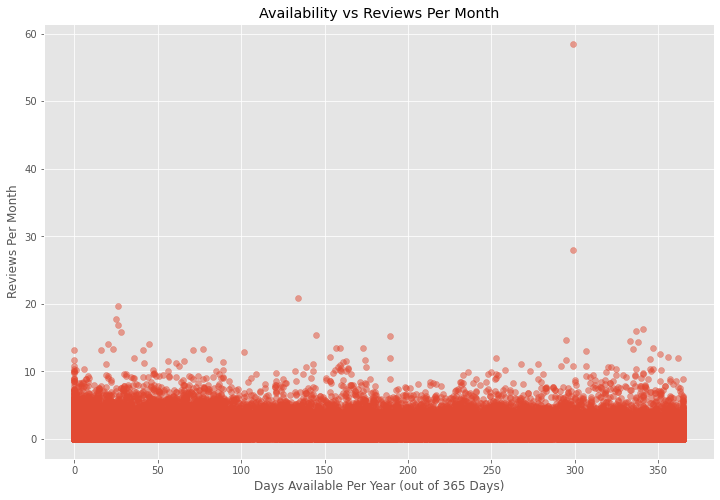

In [276]:
#does availability have any correlation with how people review the property?
#I predict not because in the app, there is a filter within the app in which the customer can choose which days they want to rent and would most likely not affect average reviews per month
plt.scatter(x=new_data['availability_365'], y=new_data['reviews_per_month'], alpha=0.5)
plt.title('Availability vs Reviews Per Month')
plt.xlabel('Days Available Per Year (out of 365 Days)')
plt.ylabel('Reviews Per Month')
plt.show()

[Text(0.5, 1.0, 'Availability vs Reviews Per Month'),
 Text(0.5, 0, 'Days Available Per Year (out of 365 Days)'),
 Text(0, 0.5, 'Reviews Per Month')]

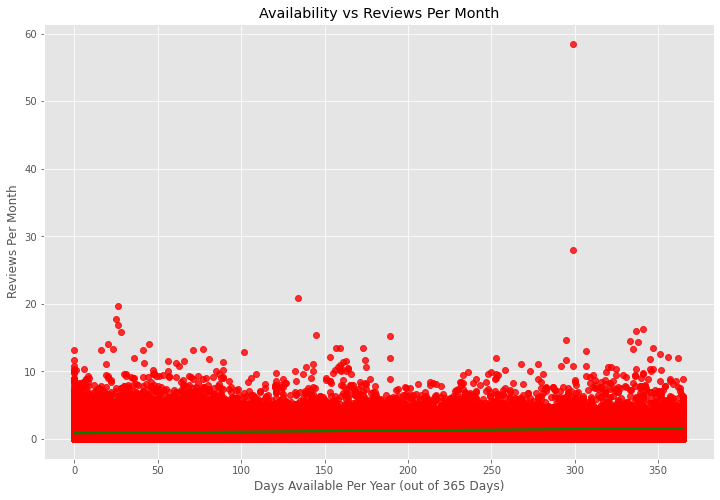

In [273]:
#convert the information above into a regplot
#the red dots show the data plotted and the green line is the trend shown

sns.regplot(x="availability_365", y="reviews_per_month", data=new_data, scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Availability vs Reviews Per Month',xlabel='Days Available Per Year (out of 365 Days)', ylabel='Reviews Per Month')

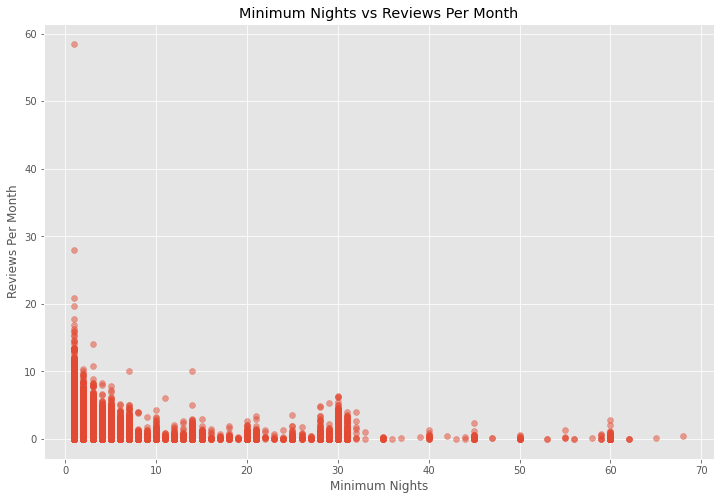

In [275]:
plt.scatter(x=new_data['minimum_nights'], y=new_data['reviews_per_month'], alpha=0.5)
plt.title('Minimum Nights vs Reviews Per Month')
plt.xlabel('Minimum Nights')
plt.ylabel('Reviews Per Month')
plt.show()

[Text(0.5, 1.0, 'Minimum Nights vs Reviews Per Month'),
 Text(0.5, 0, 'Minimum Nights'),
 Text(0, 0.5, 'Reviews Per Month')]

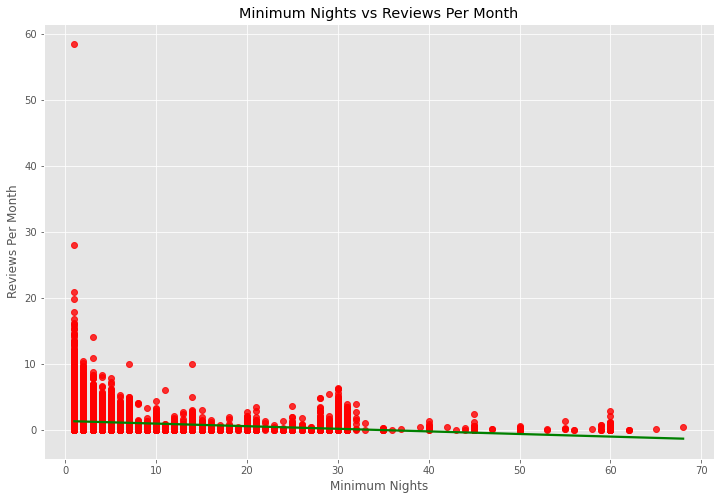

In [277]:
#because we removed outliers, out scatter plot will be more representative of the actual statistics

sns.regplot(x="minimum_nights", y="reviews_per_month", data=new_data, scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Minimum Nights vs Reviews Per Month',xlabel='Minimum Nights', ylabel='Reviews Per Month')
#this shows us that the longer minimum nights that are requested via the renter, the less reviews per month they receive. This matches my hypothesis.
#there is a lot of valume in listings that have lower number of minimum nights and would provide the greatest ROI if an airbnb seller used this information to maximize profits